#　やること
activatecheckの閾値設定

In [1]:
import corpus
import os

In [2]:
import CaboCha
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
from time import sleep

In [3]:
c = CaboCha.Parser()
tree = c.parse('そう言われると緊張するなあ。それではこうしよう。')
print(tree.toString(CaboCha.FORMAT_LATTICE))

* 0 1D 0/0 0.821629
そう	副詞,助詞類接続,*,*,*,*,そう,ソウ,ソー
* 1 2D 0/2 2.893329
言わ	動詞,自立,*,*,五段・ワ行促音便,未然形,言う,イワ,イワ
れる	動詞,接尾,*,*,一段,基本形,れる,レル,レル
と	助詞,格助詞,引用,*,*,*,と,ト,ト
* 2 5D 1/2 -1.354380
緊張	名詞,サ変接続,*,*,*,*,緊張,キンチョウ,キンチョー
する	動詞,自立,*,*,サ変・スル,基本形,する,スル,スル
なあ	助詞,終助詞,*,*,*,*,なあ,ナア,ナー
。	記号,句点,*,*,*,*,。,。,。
* 3 5D 0/0 -1.354380
それでは	接続詞,*,*,*,*,*,それでは,ソレデハ,ソレデワ
* 4 5D 0/0 -1.354380
こう	副詞,助詞類接続,*,*,*,*,こう,コウ,コー
* 5 -1D 0/1 0.000000
しよ	動詞,自立,*,*,サ変・スル,未然ウ接続,する,シヨ,シヨ
う	助動詞,*,*,*,不変化型,基本形,う,ウ,ウ
。	記号,句点,*,*,*,*,。,。,。
EOS



In [22]:
# 辞書の初期化
dic: dict[corpus.WordDicElement] = dict()
with open(os.path.join('seeds', 'emot2.txt')) as f:
    for w in f.readlines():
        sw, arg = w.split()
        dic[sw] = corpus.WordDicElement(sw)
        x, y = corpus.argtoxy(int(arg))
        dic[sw].set_value(x, y)
        dic[sw].activate()

In [23]:
learntime = 0

In [6]:
learntime += 1
filecount = 0
for file in sorted(os.listdir(os.path.join('moddata','nucc')))[:]:    
    filecount += 1
    print(learntime, filecount)
    cp = corpus.Corpus(os.path.join('moddata','nucc',file))
    dic = corpus.calc_score(cp, dic)
#print(dic.keys())
dic = corpus.calc_value(dic, learntime)

output = []
for i in dic.keys():
    if(-0.6 < corpus.xytoarg(dic[i].value_x, dic[i].value_y)[0] < 0.6 or dic[i].accesscount > 1000 * learntime):
        dic[i].set_value(0., 0.)
        dic[i].delete()
    else:
        output.append(str(dic[i]))
with open(f'emodict/output3_{learntime}.txt', mode='w') as f:
    outtxt = '''
    {"seeds":"emot.txt",\n
    '''
    outtxt += '"dict":[\n'
    outtxt += ',\n'.join(sorted(output, key=lambda x: int(x.split(':')[-2].replace('}','')), reverse=True))
    outtxt += '\n]}'
    f.write(outtxt)

1 1
1 2
1 3


SystemError: <built-in function Parser_parse> returned a result with an error set

In [24]:
#ループ版
while(learntime < 11):
    learntime += 1
    filecount = 0
    for file in sorted(os.listdir(os.path.join('moddata','nucc')))[:]:    
        filecount += 1
        print(learntime, filecount)
        cp = corpus.Corpus(os.path.join('moddata','nucc',file))
        dic = corpus.calc_score(cp, dic)
    #print(dic.keys())
    dic = corpus.calc_value(dic, learntime)

    output = []
    for i in dic.keys():
        if(-0.6 < corpus.xytoarg(dic[i].value_x, dic[i].value_y)[0] < 0.6 or dic[i].accesscount > 1000 * learntime or dic[i].isdeleted):
            dic[i].set_value(0., 0.)
            dic[i].delete()
        else:
            output.append(str(dic[i]))
    with open(f'emodict/output4_{learntime}.txt', mode='w') as f:
        outtxt = '''
        {"feature":"種表現を追加",
        "seeds":"emot2.txt",\n
        '''
        outtxt += '"dict":[\n'
        outtxt += ',\n'.join(sorted(output, key=lambda x: int(x.split(',')[-2].split(':')[-1]), reverse=True))
        outtxt += '\n]}'
        f.write(outtxt)

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 97
1 98
1 99
1 100
1 101
1 102
1 103
1 104
1 105
1 106
1 107
1 108
1 109
1 110
1 111
1 112
1 113
1 114
1 115
1 116
1 117
1 118
1 119
1 120
1 121
1 122
1 123
1 124
1 125
1 126
1 127
1 128
1 129
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
2 50
2 51
2 52
2 53
2 54
2 55
2 56
2 57
2 58
2 59
2 60
2 61
2 62
2 63
2 64
2 65
2 66
2 67
2 68
2 6

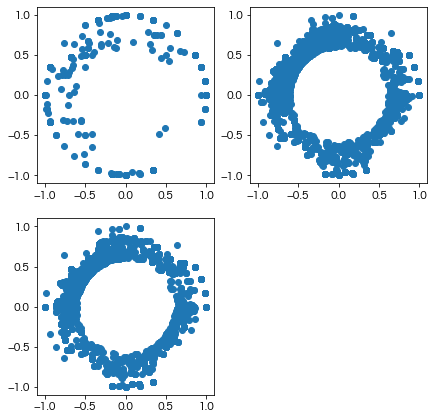

In [16]:


plt.rcParams['font.family'] = 'Hiragino Sans'
fig = plt.figure(figsize=(7,7), dpi=72)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
x = []
y = []
with open('emodict/output3_1.txt') as f:
    fl = [json.loads(i) for i in f.readlines()]
    for i, d in enumerate(fl):
        x.append(d['position'][0])
        y.append(d['position'][1])
    ax1.scatter(x, y)
x = []
y = []
with open('emodict/output3_5.txt') as f:
    fl = [json.loads(i) for i in f.readlines()]
    for i, d in enumerate(fl):
        x.append(d['position'][0])
        y.append(d['position'][1])
    ax2.scatter(x, y)
x = []
y = []
with open('emodict/output3_11.txt') as f:
    fl = [json.loads(i) for i in f.readlines()]
    for i, d in enumerate(fl):
        x.append(d['position'][0])
        y.append(d['position'][1])
    ax3.scatter(x, y)

In [ ]:
plt.rcParams['font.family'] = 'Hiragino Sans'
fig2 = plt.figure(figsize=(7,7), dpi=72)
ax2 = fig2.add_subplot(111)
x2 = []
y2 = []
spx2 = []
spy2 = []
with open('emodict/output_.txt') as f:
    fl = [json.loads(i) for i in f.readlines()]
    for i, d in enumerate(fl):
        if(i != count):
            x2.append(d['position'][0])
            y2.append(d['position'][1])
        else:
            spx2.append(d['position'][0])
            spy2.append(d['position'][1])
    lemma = fl[count2]['lemma']
    fig2.text(0.5, 0.2, f'{count2}, {lemma}', c='red', fontsize=15)
    ax2.scatter(x2, y2)
    ax2.scatter(spx2, spy2, c='red')
count2 += 1

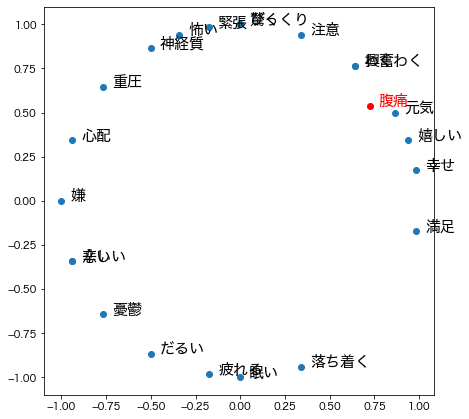

In [16]:
plt.rcParams['font.family'] = 'Hiragino Sans'
fig3 = plt.figure(figsize=(7,7), dpi=72)
ax3 = fig3.add_subplot(111)
x3 = []
y3 = []
tag3 = []
spx3 = []
spy3 = []
spword3 = '腹痛'
with open('seeds/emot.txt') as f:
    fl = f.readlines()
    for i in fl:
        lemma, arg = i.split()
        xp, yp = corpus.argtoxy(int(arg))
        x3.append(xp)
        y3.append(yp)
        tag3.append(lemma)
        ax3.text(xp+0.05, yp, lemma, fontsize=15)

ax3.scatter(x3, y3)
spx3.append(emodic2[spword3][0])
spy3.append(emodic2[spword3][1])
ax3.text(spx3[0]+0.05, spy3[0], spword3, fontsize=15, c='red')
ax3.scatter(spx3, spy3, c='red')

In [ ]:
len(x3)
len(tag3)

In [13]:
for i in range(1,12):
    with open(f'emodict/output3_{i}.txt', encoding='utf-8') as f:
        output = [f.readlines()
    l = '\n'.join(sorted(output, key=lambda x: int(x.split(',')[-2].split(':')[-1].replace('}','')), reverse=True))
    with open(f'emodict/output3_{i}.txt', encoding='utf-8', mode='w') as f:
        f.write(l)